In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [107]:

"""alpha = 10.0"""
pinnDf = pd.read_csv("./error_data/pinn_error_data.csv")
pinnDf = pinnDf[pinnDf["alpha"].isin([10.0])]
#pinnDf = pinnDf[pinnDf["mean absolute error"] < 0.1]
pinnDf = pinnDf.drop(["Unnamed: 0"],axis=1)
pinnDf

,# of training points,alpha,neural net architecture,RMSE,mean absolute error,max absolute error
5,54636,10.0,"[2, 20, 1]",0.047,0.035,0.177
6,9878,10.0,"[2, 30, 1]",0.213,0.164,0.445
7,4224,10.0,"[2, 20, 20, 1]",0.037,0.023,0.172
10,17255,10.0,"[2, 20, 1]",0.032,0.023,0.130
15,956,10.0,"[2, 30, 1]",0.185,0.133,0.434
17,31547,10.0,"[2, 30, 1]",0.482,0.370,0.982
18,4224,10.0,"[2, 20, 1]",0.026,0.019,0.093
19,4224,10.0,"[2, 30, 30, 1]",0.038,0.026,0.184
21,31547,10.0,"[2, 30, 20, 1]",0.471,0.363,0.980
25,54636,10.0,"[2, 30, 20, 1]",0.481,0.372,0.982


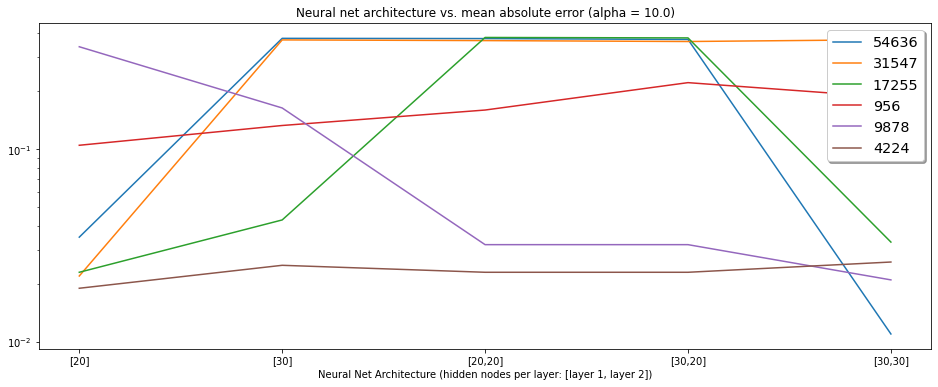

In [108]:
"""alpha = 10.0"""

# at this point, pinnDf has alpha = 10.0 and MAE < 0.1
# now we plot architecture on the x axis and MAE on the y axis
arch_ind_dict = {'[2, 20, 1]': 1, '[2, 30, 1]':2, '[2, 20, 20, 1]':3,'[2, 30, 20, 1]':4,'[2, 30, 30, 1]':5}
marker_dict = {54636:"+",31547:"x",17255:"d",956:"X",9878:"1",4224:"o"}
c_dict= {54636:"r",31547:"g",17255:"b",956:"r",9878:"y",4224:"k"}
# mark points according to which training set they came from.
# we include a key for the different markings
fig, ax = plt.subplots(figsize=(16, 6))
labels = ['','[20]', '[30]', '[20,20]', '[30,20]', '[30,30]', '']
x = np.arange(len(labels))
ax.set_title("Neural net architecture vs. mean absolute error (alpha = 10.0)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Neural Net Architecture (hidden nodes per layer: [layer 1, layer 2])")
ax.set_yscale("log")

tr1 = pinnDf[pinnDf["# of training points"].isin([54636])]
tr2 = pinnDf[pinnDf["# of training points"].isin([31547])]
tr3 = pinnDf[pinnDf["# of training points"].isin([17255])]
tr4 = pinnDf[pinnDf["# of training points"].isin([956])]
tr5 = pinnDf[pinnDf["# of training points"].isin([9878])]
tr6 = pinnDf[pinnDf["# of training points"].isin([4224])]

trs = [tr1,tr2,tr3,tr4,tr5,tr6]

label = ['54636','31547','17255','956','9878','4224']

for i, tr in enumerate(trs):
    arc1 = np.empty((len(tr),2), dtype=object)

    for index, row in enumerate(tr.itertuples(index=False)):
        arc1[index] = np.array([arch_ind_dict[row[2]],row[4]])

    arc1 = arc1[arc1[:,0].argsort()]

    ax.plot(arc1[:,0],arc1[:,1], label=label[i])
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.savefig("./error_data/Neural net architecture vs. mean absolute error (alpha = 10.0).png")

    # of training points  alpha neural net architecture   RMSE  \
5                  54636   10.0              [2, 20, 1]  0.047   
10                 17255   10.0              [2, 20, 1]  0.032   
18                  4224   10.0              [2, 20, 1]  0.026   
36                  9878   10.0              [2, 20, 1]  0.442   
45                 31547   10.0              [2, 20, 1]  0.030   
75                   956   10.0              [2, 20, 1]  0.142   

    mean absolute error  max absolute error  
5                 0.035               0.177  
10                0.023               0.130  
18                0.019               0.093  
36                0.341               0.844  
45                0.022               0.118  
75                0.105               0.339  


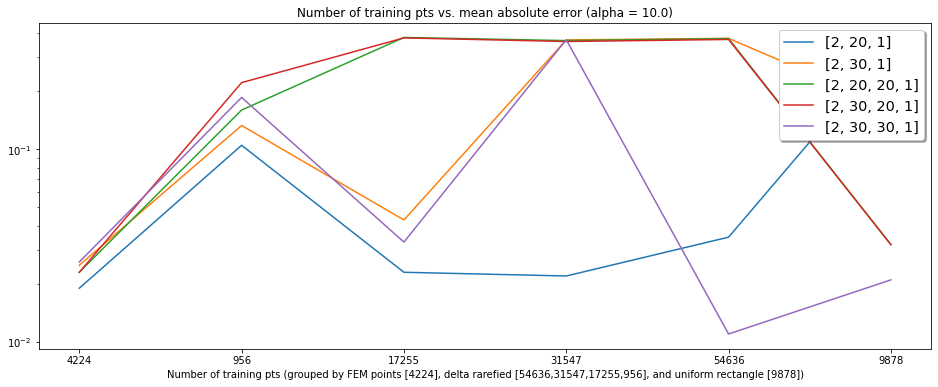

In [109]:
"""alpha = 10.0"""

# at this point, pinnDf has alpha = 10.0 and MAE < 0.1
# now we plot training points on the x axis and MAE on the y axis
trptsdict = {54636:4,31547:3,17255:2,956:1,9878:5,4224:0}
c_dict= {54636:"r",31547:"g",17255:"b",956:"r",9878:"y",4224:"k"}
# mark points according to which training set they came from.
# we include a key for the different markings
fig, ax = plt.subplots(figsize=(16, 6))
labels = ['4224', '956', '17255', '31547', '54636','9878']
x = np.arange(len(labels))
ax.set_title("Number of training pts vs. mean absolute error (alpha = 10.0)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Number of training pts (grouped by FEM points [4224], delta rarefied [54636,31547,17255,956], and uniform rectangle [9878])")
ax.set_yscale("log")

archt1 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 20, 1]'])]
archt2 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 1]'])]
archt3 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 20, 20, 1]'])]
archt4 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 20, 1]'])]
archt5 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 30, 1]'])]

print(archt1)

archts = [archt1,archt2,archt3,archt4,archt5]

label = ['[2, 20, 1]', '[2, 30, 1]', '[2, 20, 20, 1]','[2, 30, 20, 1]','[2, 30, 30, 1]']

for i, archt in enumerate(archts):
    arc1 = np.empty((len(archt),2), dtype=object)

    for index, row in enumerate(archt.itertuples(index=False)):
        arc1[index] = np.array([trptsdict[row[0]],row[4]])

    arc1 = arc1[arc1[:,0].argsort()]

    ax.plot(arc1[:,0],arc1[:,1], label=label[i])
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.savefig("./error_data/Number of training pts vs. mean absolute error (alpha = 10.0).png")

In [110]:
"""alpha = 15.0"""
pinnDf = pd.read_csv("./error_data/pinn_error_data.csv")
pinnDf = pinnDf[pinnDf["alpha"].isin([15.0])]
#pinnDf = pinnDf[pinnDf["mean absolute error"] < 0.1]
pinnDf = pinnDf.drop(["Unnamed: 0"],axis=1)
pinnDf

,# of training points,alpha,neural net architecture,RMSE,mean absolute error,max absolute error
0,54636,15.0,"[2, 20, 20, 1]",0.451,0.340,0.984
3,956,15.0,"[2, 20, 20, 1]",0.269,0.196,0.556
4,4224,15.0,"[2, 30, 1]",0.163,0.128,0.354
8,54636,15.0,"[2, 30, 1]",0.483,0.369,0.985
12,17255,15.0,"[2, 20, 20, 1]",0.488,0.375,0.986
14,31547,15.0,"[2, 30, 30, 1]",0.492,0.380,0.991
16,17255,15.0,"[2, 20, 1]",0.037,0.028,0.136
20,9878,15.0,"[2, 20, 20, 1]",0.420,0.325,0.952
22,9878,15.0,"[2, 20, 1]",0.229,0.176,0.463
27,17255,15.0,"[2, 30, 30, 1]",0.484,0.372,0.986


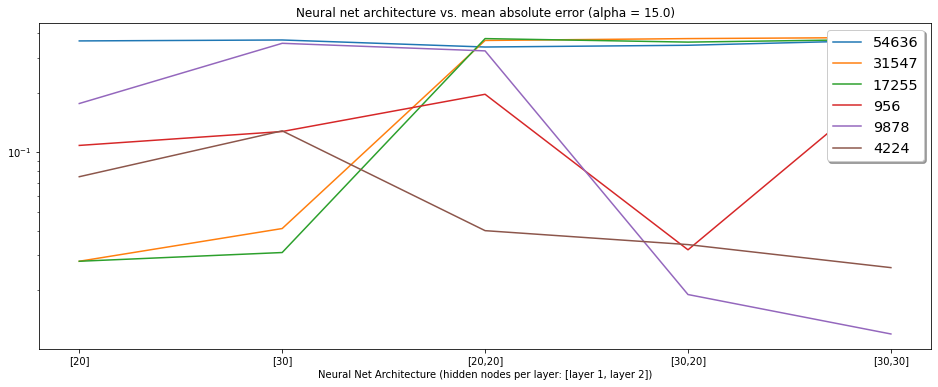

In [111]:
"""alpha = 15.0"""

# at this point, pinnDf has alpha = 10.0 and MAE < 0.1
# now we plot architecture on the x axis and MAE on the y axis
arch_ind_dict = {'[2, 20, 1]': 1, '[2, 30, 1]':2, '[2, 20, 20, 1]':3,'[2, 30, 20, 1]':4,'[2, 30, 30, 1]':5}
marker_dict = {54636:"+",31547:"x",17255:"d",956:"X",9878:"1",4224:"o"}
c_dict= {54636:"r",31547:"g",17255:"b",956:"r",9878:"y",4224:"k"}
# mark points according to which training set they came from.
# we include a key for the different markings
fig, ax = plt.subplots(figsize=(16, 6))
labels = ['','[20]', '[30]', '[20,20]', '[30,20]', '[30,30]', '']
x = np.arange(len(labels))
ax.set_title("Neural net architecture vs. mean absolute error (alpha = 15.0)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Neural Net Architecture (hidden nodes per layer: [layer 1, layer 2])")
ax.set_yscale("log")

tr1 = pinnDf[pinnDf["# of training points"].isin([54636])]
tr2 = pinnDf[pinnDf["# of training points"].isin([31547])]
tr3 = pinnDf[pinnDf["# of training points"].isin([17255])]
tr4 = pinnDf[pinnDf["# of training points"].isin([956])]
tr5 = pinnDf[pinnDf["# of training points"].isin([9878])]
tr6 = pinnDf[pinnDf["# of training points"].isin([4224])]

trs = [tr1,tr2,tr3,tr4,tr5,tr6]

label = ['54636','31547','17255','956','9878','4224']

for i, tr in enumerate(trs):
    arc1 = np.empty((len(tr),2), dtype=object)

    for index, row in enumerate(tr.itertuples(index=False)):
        arc1[index] = np.array([arch_ind_dict[row[2]],row[4]])

    arc1 = arc1[arc1[:,0].argsort()]

    ax.plot(arc1[:,0],arc1[:,1], label=label[i])
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.savefig("./error_data/Neural net architecture vs. mean absolute error (alpha = 15.0).png")

    # of training points  alpha neural net architecture   RMSE  \
16                 17255   15.0              [2, 20, 1]  0.037   
22                  9878   15.0              [2, 20, 1]  0.229   
34                 54636   15.0              [2, 20, 1]  0.476   
79                 31547   15.0              [2, 20, 1]  0.037   
84                  4224   15.0              [2, 20, 1]  0.100   
89                   956   15.0              [2, 20, 1]  0.148   

    mean absolute error  max absolute error  
16                0.028               0.136  
22                0.176               0.463  
34                0.365               0.977  
79                0.028               0.146  
84                0.075               0.207  
89                0.108               0.345  


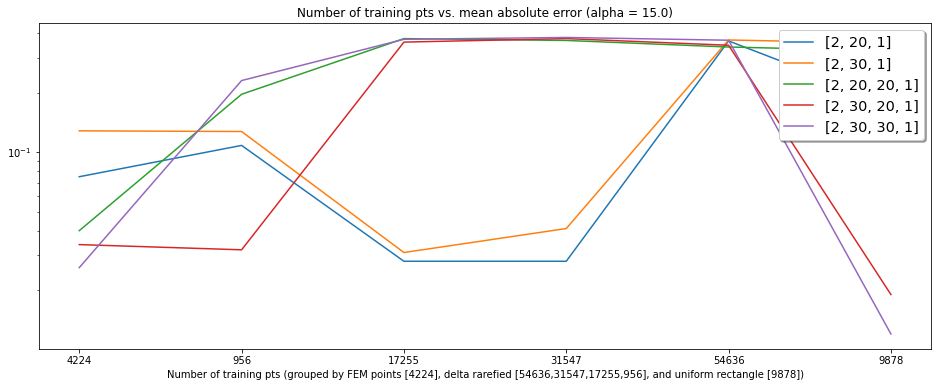

In [112]:
"""alpha = 15.0"""

# at this point, pinnDf has alpha = 10.0 and MAE < 0.1
# now we plot training points on the x axis and MAE on the y axis
trptsdict = {54636:4,31547:3,17255:2,956:1,9878:5,4224:0}
c_dict= {54636:"r",31547:"g",17255:"b",956:"r",9878:"y",4224:"k"}
# mark points according to which training set they came from.
# we include a key for the different markings
fig, ax = plt.subplots(figsize=(16, 6))
labels = ['4224', '956', '17255', '31547', '54636','9878']
x = np.arange(len(labels))
ax.set_title("Number of training pts vs. mean absolute error (alpha = 15.0)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Number of training pts (grouped by FEM points [4224], delta rarefied [54636,31547,17255,956], and uniform rectangle [9878])")
ax.set_yscale("log")

archt1 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 20, 1]'])]
archt2 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 1]'])]
archt3 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 20, 20, 1]'])]
archt4 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 20, 1]'])]
archt5 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 30, 1]'])]

print(archt1)

archts = [archt1,archt2,archt3,archt4,archt5]

label = ['[2, 20, 1]', '[2, 30, 1]', '[2, 20, 20, 1]','[2, 30, 20, 1]','[2, 30, 30, 1]']

for i, archt in enumerate(archts):
    arc1 = np.empty((len(archt),2), dtype=object)

    for index, row in enumerate(archt.itertuples(index=False)):
        arc1[index] = np.array([trptsdict[row[0]],row[4]])

    arc1 = arc1[arc1[:,0].argsort()]

    ax.plot(arc1[:,0],arc1[:,1], label=label[i])
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.savefig("./error_data/Number of training pts vs. mean absolute error (alpha = 15.0).png")

In [113]:
"""alpha = 20.0"""
pinnDf = pd.read_csv("./error_data/pinn_error_data.csv")
pinnDf = pinnDf[pinnDf["alpha"].isin([20.0])]
#pinnDf = pinnDf[pinnDf["mean absolute error"] < 0.1]
pinnDf = pinnDf.drop(["Unnamed: 0"],axis=1)
pinnDf

,# of training points,alpha,neural net architecture,RMSE,mean absolute error,max absolute error
1,9878,20.0,"[2, 30, 30, 1]",0.173,0.133,0.380
2,54636,20.0,"[2, 20, 1]",0.484,0.372,0.979
9,956,20.0,"[2, 20, 1]",0.135,0.098,0.331
11,31547,20.0,"[2, 30, 1]",0.473,0.362,0.974
13,31547,20.0,"[2, 20, 1]",0.045,0.034,0.180
23,54636,20.0,"[2, 20, 20, 1]",0.480,0.368,0.984
24,4224,20.0,"[2, 30, 20, 1]",0.043,0.025,0.239
26,956,20.0,"[2, 20, 20, 1]",0.165,0.120,0.339
28,4224,20.0,"[2, 30, 1]",0.145,0.115,0.327
29,956,20.0,"[2, 30, 20, 1]",0.207,0.144,0.496


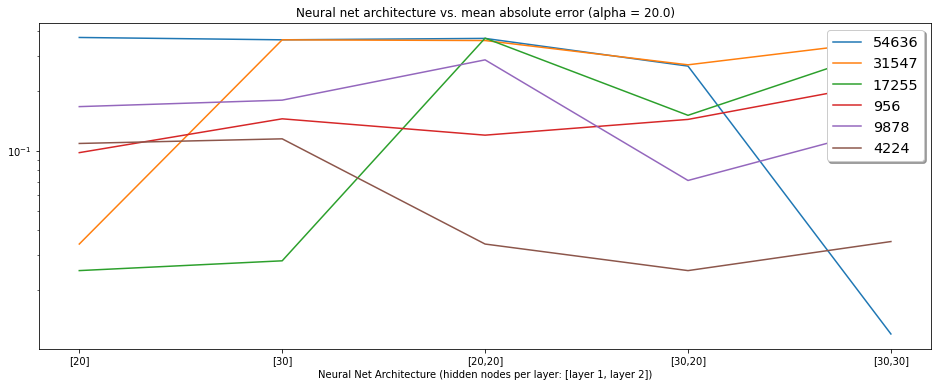

In [114]:
"""alpha = 20.0"""

# at this point, pinnDf has alpha = 10.0 and MAE < 0.1
# now we plot architecture on the x axis and MAE on the y axis
arch_ind_dict = {'[2, 20, 1]': 1, '[2, 30, 1]':2, '[2, 20, 20, 1]':3,'[2, 30, 20, 1]':4,'[2, 30, 30, 1]':5}
marker_dict = {54636:"+",31547:"x",17255:"d",956:"X",9878:"1",4224:"o"}
c_dict= {54636:"r",31547:"g",17255:"b",956:"r",9878:"y",4224:"k"}
# mark points according to which training set they came from.
# we include a key for the different markings
fig, ax = plt.subplots(figsize=(16, 6))
labels = ['','[20]', '[30]', '[20,20]', '[30,20]', '[30,30]', '']
x = np.arange(len(labels))
ax.set_title("Neural net architecture vs. mean absolute error (alpha = 20.0)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Neural Net Architecture (hidden nodes per layer: [layer 1, layer 2])")
ax.set_yscale("log")

tr1 = pinnDf[pinnDf["# of training points"].isin([54636])]
tr2 = pinnDf[pinnDf["# of training points"].isin([31547])]
tr3 = pinnDf[pinnDf["# of training points"].isin([17255])]
tr4 = pinnDf[pinnDf["# of training points"].isin([956])]
tr5 = pinnDf[pinnDf["# of training points"].isin([9878])]
tr6 = pinnDf[pinnDf["# of training points"].isin([4224])]

trs = [tr1,tr2,tr3,tr4,tr5,tr6]

label = ['54636','31547','17255','956','9878','4224']

for i, tr in enumerate(trs):
    arc1 = np.empty((len(tr),2), dtype=object)

    for index, row in enumerate(tr.itertuples(index=False)):
        arc1[index] = np.array([arch_ind_dict[row[2]],row[4]])

    arc1 = arc1[arc1[:,0].argsort()]

    ax.plot(arc1[:,0],arc1[:,1], label=label[i])
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.savefig("./error_data/Neural net architecture vs. mean absolute error (alpha = 20.0).png")

    # of training points  alpha neural net architecture   RMSE  \
2                  54636   20.0              [2, 20, 1]  0.484   
9                    956   20.0              [2, 20, 1]  0.135   
13                 31547   20.0              [2, 20, 1]  0.045   
40                  9878   20.0              [2, 20, 1]  0.216   
62                  4224   20.0              [2, 20, 1]  0.142   
65                 17255   20.0              [2, 20, 1]  0.035   

    mean absolute error  max absolute error  
2                 0.372               0.979  
9                 0.098               0.331  
13                0.034               0.180  
40                0.167               0.441  
62                0.109               0.326  
65                0.025               0.146  


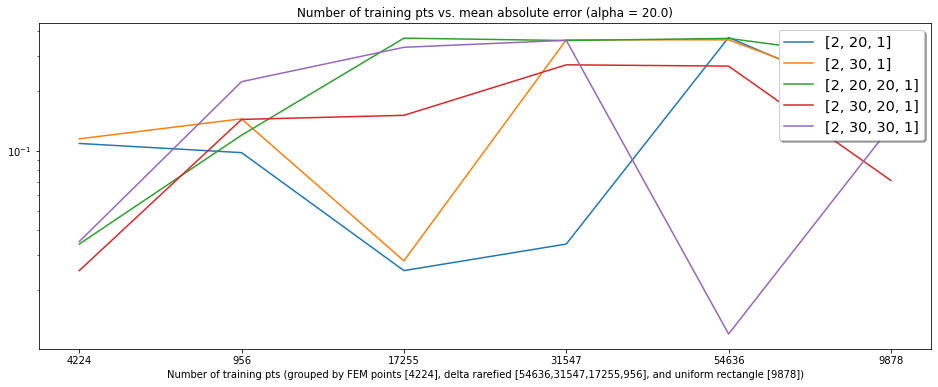

In [115]:
"""alpha = 20.0"""

# at this point, pinnDf has alpha = 10.0 and MAE < 0.1
# now we plot training points on the x axis and MAE on the y axis
trptsdict = {54636:4,31547:3,17255:2,956:1,9878:5,4224:0}
c_dict= {54636:"r",31547:"g",17255:"b",956:"r",9878:"y",4224:"k"}
# mark points according to which training set they came from.
# we include a key for the different markings
fig, ax = plt.subplots(figsize=(16, 6))
labels = ['4224', '956', '17255', '31547', '54636','9878']
x = np.arange(len(labels))
ax.set_title("Number of training pts vs. mean absolute error (alpha = 20.0)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Number of training pts (grouped by FEM points [4224], delta rarefied [54636,31547,17255,956], and uniform rectangle [9878])")
ax.set_yscale("log")

archt1 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 20, 1]'])]
archt2 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 1]'])]
archt3 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 20, 20, 1]'])]
archt4 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 20, 1]'])]
archt5 = pinnDf[pinnDf["neural net architecture"].isin(['[2, 30, 30, 1]'])]

print(archt1)

archts = [archt1,archt2,archt3,archt4,archt5]

label = ['[2, 20, 1]', '[2, 30, 1]', '[2, 20, 20, 1]','[2, 30, 20, 1]','[2, 30, 30, 1]']

for i, archt in enumerate(archts):
    arc1 = np.empty((len(archt),2), dtype=object)

    for index, row in enumerate(archt.itertuples(index=False)):
        arc1[index] = np.array([trptsdict[row[0]],row[4]])

    arc1 = arc1[arc1[:,0].argsort()]

    ax.plot(arc1[:,0],arc1[:,1], label=label[i])
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.savefig("./error_data/Number of training pts vs. mean absolute error (alpha = 20.0).png")
